In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go 
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



/kaggle/input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv


In [2]:
df = pd.read_csv('/kaggle/input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
print(df.name.nunique())
print(df.name.unique())

1491
['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']


In [7]:
# Feature engineering, creating a brand column using the name of the car 
df['brand'] = df['name'].apply(lambda x:x.split()[0])

In [8]:
print(df.brand.nunique())
print(df.brand.unique())

29
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand'],
      dtype='object')

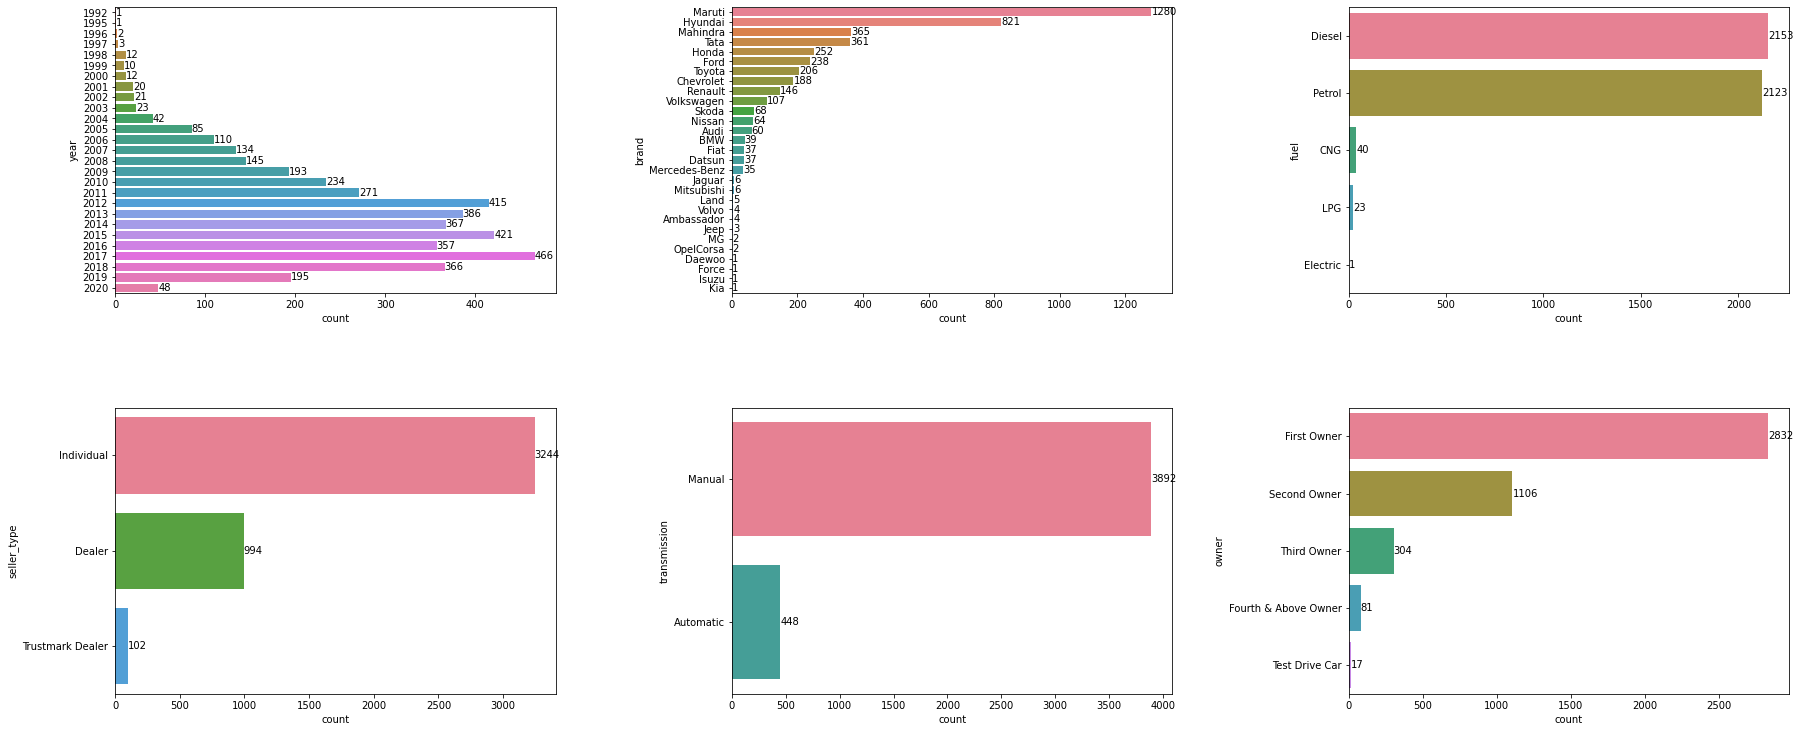

In [10]:
fig = plt.figure(figsize=(30,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(3, 3, 1)
ax = sns.countplot(data=df, y="year",palette='husl')
ax.bar_label(ax.containers[0])
ax = fig.add_subplot(3, 3, 2)
ax = sns.countplot(data=df, y="brand",order = df['brand'].value_counts().index,palette='husl')
ax.bar_label(ax.containers[0])
ax = fig.add_subplot(3, 3, 3)
ax = sns.countplot(data=df, y="fuel",order = df['fuel'].value_counts().index,palette='husl')
ax.bar_label(ax.containers[0])
ax = fig.add_subplot(3, 3, 4)
ax = sns.countplot(data=df, y="seller_type",order = df['seller_type'].value_counts().index,palette='husl')
ax.bar_label(ax.containers[0])
ax = fig.add_subplot(3, 3, 5)
ax = sns.countplot(data=df, y='transmission',order = df['transmission'].value_counts().index,palette='husl')
ax.bar_label(ax.containers[0])
ax = fig.add_subplot(3, 3, 6)
ax = sns.countplot(data=df, y='owner',order = df['owner'].value_counts().index,palette='husl')
ax.bar_label(ax.containers[0])
plt.show()

In [11]:
trace = go.Pie(labels = df['year'].value_counts().keys().tolist(),
              values = df['year'].value_counts().values.tolist(),
              marker = dict(colors =['dodgerblue','orange']),
              rotation = 90, hole =.2)
layout = go.Layout (title='Brand distribution')
data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [12]:
trace = go.Pie(labels = df['brand'].value_counts().keys().tolist(),
              values = df['brand'].value_counts().values.tolist(),
              marker = dict(colors =['dodgerblue','orange']),
              rotation = 90, hole =.2)
layout = go.Layout (title='Brand distribution')
data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [13]:
trace = go.Pie(labels = df['fuel'].value_counts().keys().tolist(),
              values = df['fuel'].value_counts().values.tolist(),
              marker = dict(colors =['dodgerblue','orange']),
              rotation = 90, hole =.2)
layout = go.Layout (title='Brand distribution')
data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [14]:
trace = go.Pie(labels = df['seller_type'].value_counts().keys().tolist(),
              values = df['seller_type'].value_counts().values.tolist(),
              marker = dict(colors =['dodgerblue','orange']),
              rotation = 90, hole =.2)
layout = go.Layout (title='Brand distribution')
data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [15]:
trace = go.Pie(labels = df['transmission'].value_counts().keys().tolist(),
              values = df['transmission'].value_counts().values.tolist(),
              marker = dict(colors =['dodgerblue','orange']),
              rotation = 90, hole =.2)
layout = go.Layout (title='Brand distribution')
data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [16]:
trace = go.Pie(labels = df['owner'].value_counts().keys().tolist(),
              values = df['owner'].value_counts().values.tolist(),
              marker = dict(colors =['dodgerblue','orange']),
              rotation = 90, hole =.2)
layout = go.Layout (title='Brand distribution')
data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)